In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

In [2]:
# Read dataset file
df = pd.read_csv('MBB.csv')
df = df[['Price']]
df = df.dropna()
df

,Price
0,11783.9
1,12267.4
2,12267.4
3,12307.6
4,12448.7
...,...
1237,18850.0
1238,18800.0
1239,18450.0
1240,18600.0


In [3]:
# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [4]:
# Normalize the data
mean = train_data.mean()
meant = test_data.mean()
meanv = val_data.mean()
std = train_data.std()
stdt = test_data.std()
stdv = val_data.std()
train_data = (train_data - mean) / std
test_data = (test_data - meant) / stdt
val_data = (val_data - meanv) / stdv

In [5]:
# Prepare the data for CNN
window_size = 10

def create_sequences(data, window_size):
    X = []
    y = []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data.values, window_size)
X_test, y_test = create_sequences(test_data.values, window_size)
X_val, y_val = create_sequences(val_data.values, window_size)


In [6]:
# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(window_size, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [7]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/100
23/23 [==============================] - 13s 15ms/step - loss: 0.2380 - val_loss: 0.6763
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0438 - val_loss: 0.4933
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0273 - val_loss: 0.4334
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0227 - val_loss: 0.3670
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0191 - val_loss: 0.3225
Epoch 6/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0173 - val_loss: 0.2933
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0154 - val_loss: 0.2819
Epoch 8/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0137 - val_loss: 0.2505
Epoch 9/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0145 - val_loss: 0.2361
Epoch 10/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0124 - val_loss: 0.2234
Epoch 1

In [8]:
# Make predictions
y_pred = model.predict(X_test)
# Inverse transform the predictions
y_pred = y_pred * pd.Series(stdt).values[0] + pd.Series(meant).values[0]

12/12 [==============================] - 0s 4ms/step


In [9]:
# Make predictions
y_vpred = model.predict(X_val)
# Inverse transform the predictions
y_vpred = y_vpred * pd.Series(stdv).values[0] + pd.Series(meanv).values[0]

4/4 [==============================] - 0s 3ms/step


In [ ]:
df

,Price
0,11783.9
1,12267.4
2,12267.4
3,12307.6
4,12448.7
...,...
1237,18850.0
1238,18800.0
1239,18450.0
1240,18600.0


In [10]:
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]
# re make predictions on the testing set
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
# re make predictions on the validate set
x_val = np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]
# calculate the RMSE
valid_rmse = np.sqrt(np.mean((y_vpred - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# calculate the MAPE
valid_mape = np.mean(np.abs((y_val - y_vpred) / y_val)) * 100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Validation MAPE:", valid_mape)
print("Testing MAPE:", test_mape)

# calculate the MAE
valid_mae = np.mean(np.abs(y_vpred - y_val))
test_mae = np.mean(np.abs(y_pred - y_test))
print("Validation MAE:", valid_mae)
print("Testing MAPE:", test_mae)

Validation RMSE: 1074.017559657025
Testing RMSE: 3795.8975581448954
Validation MAPE: 4.572927163847327
Testing MAPE: 13.133063426593955
Validation MAE: 796.9650421195652
Testing MAPE: 2933.314822313545


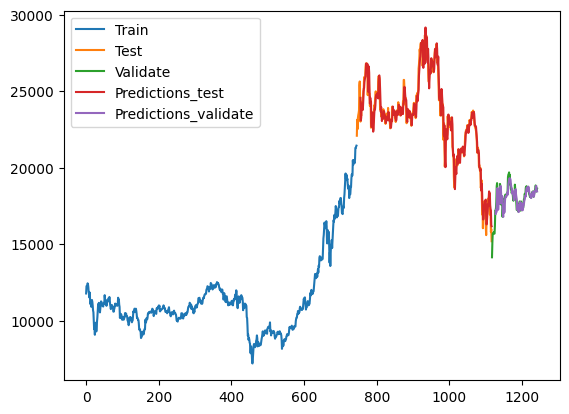

In [11]:
# ploting the actual values and predicted values
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index[-len(y_pred):], y_pred)
plt.plot(val_data.index[-len(y_vpred):], y_vpred)
plt.legend(['Train', 'Test','Validate', 'Predictions_test','Predictions_validate'])
plt.show()

In [ ]:
y_val

array([14150., 15100., 15700., 15700., 15700., 15800., 15700., 15700.,
       16200., 17200., 17200., 17400., 17800., 18800., 19000., 17700.,
       17300., 18100., 18200., 17700., 18000., 18150., 18950., 18800.,
       18350., 17600., 17700., 18000., 17750., 16800., 17250., 17450.,
       17400., 17100., 18000., 17950., 18200., 18250., 18250., 18200.,
       18250., 18250., 18250., 18500., 19400., 19550., 19600., 19700.,
       19250., 19550., 18900., 18950., 18600., 18700., 18350., 18400.,
       18450., 18300., 18000., 17850., 18000., 18250., 18100., 18900.,
       18600., 18250., 18150., 17700., 17250., 17250., 17650., 17400.,
       17150., 17300., 17400., 17600., 17800., 17750., 17500., 17200.,
       17800., 17450., 17450., 17300., 17350., 17400., 17400., 17750.,
       17950., 18000., 18300., 18250., 18250., 18700., 18750., 18800.,
       18500., 18600., 18600., 18750., 18700., 18550., 18300., 18250.,
       18150., 18100., 18150., 18050., 18250., 18250., 18350., 18400.,
      

In [ ]:
y_vpred

array([[16827.719],
       [17140.734],
       [17144.986],
       [17470.44 ],
       [17876.402],
       [18674.738],
       [17877.684],
       [16807.396],
       [16840.867],
       [18507.19 ],
       [18132.426],
       [17303.865],
       [17588.31 ],
       [18762.516],
       [19104.244],
       [18524.613],
       [17593.871],
       [17660.637],
       [18159.07 ],
       [17980.59 ],
       [16800.215],
       [16604.387],
       [17204.277],
       [17644.414],
       [17106.814],
       [17372.734],
       [17723.48 ],
       [18018.875],
       [18227.896],
       [18055.293],
       [18088.762],
       [18199.916],
       [18204.875],
       [18178.158],
       [18460.16 ],
       [19230.254],
       [19468.105],
       [19621.277],
       [19511.54 ],
       [19342.4  ],
       [19267.17 ],
       [19295.57 ],
       [19119.896],
       [18940.645],
       [18732.145],
       [18657.562],
       [18306.715],
       [18370.574],
       [18337.23 ],
       [18072.346],
